#Это черновик, который рождался по мере прохождения урока. Тут легко запутаться и сложно ориентироваться. Он по сути нужен, как доказательство моего ручного труда. Итоговый вариант хранится в тетрадках:

1.   Lesson_1_part_1_solution.ipynb
2.   Lesson_1_part_2_prepare.ipynb



#First line regression
Первая Линейная регрессия

Student data

На наборе данных о студентах

This notebook analyises pass/fail data for a class

В наборе данных рассматриваются ученики прошедшие или провалившие экзамен

I think it coud be good point for start iin DS

Это может стать первым шагом в изучении науки о данных

## Оглавление
- [Описание данных](#описание-данных)
- [Загрузка данных](#импорты-и-загрузка-данных)
- [Исследовательский анализ данных (EDA)](#исследовательский-анализ-данных-eda)
- [Предобработка данных](#предобработка-данных)
- [Построение моделей](#построение-моделей)
- [Оценка моделей](#оценка-моделей)
- [Выводы и рекомендации](#выводы-и-рекомендации)
- [Технико-методологические заметки](#технико-методологические-заметки)


## Описание данных
Данные взяты из обучающего набора Visual Studio code








In [ ]:
#Visual Studio data
#List with Grades
data = [50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 78, 27, 36, 35, 48, 52, 63, 64]
#Now lets have add Study hours
study_hours = [10.0,11.5,9.0,16.0,9.25,1.0,11.5,9.0,8.5,14.5,15.5,13.75,9.0,8.0,15.5,8.0,9.0,6.0,10.0,12.0,12.5,12.0]

Часть данных генерируется в ходе подготовки к выполнению основной задачи урока


In [ ]:
#DF будет состоять из колонок ['Name','StudyHours','Grade']
#Мы могли бы написать 'Name' руками, или попросить список у GPT, или найти в интернете, но как мы тогда самоутвердимся?

#Устанавливаем библиотеку
!pip install faker

import numpy as np
import pandas as pd
from faker import Faker

"""
Эта функция создает DataFrame с данными о студентах с колонками Name, StudyHours и Grade.

Параметры:
- data_lists: *список списков* - Переменное количество списков, каждый из которых содержит числовые данные одинаковой длины.

Возвращает:
- pd.DataFrame: DataFrame, содержащий сгенерированные данные о студентах.

Исключения:
- ValueError: Если не передано ни одного списка или списки имеют разную длину.

Пример:
>>> study_hours = [10, 15, 20, 25]
>>> data = [85, 90, 78, 92]
>>> students_df = create_student_dataframe(study_hours, grades)
>>> print(students_df.head())
"""
def create_student_dataframe(*data_lists) -> pd.DataFrame:
    if not data_lists:
        raise ValueError("Необходимо передать хотя бы один список данных.")

    data_array = np.array(data_lists)
    fake = Faker('ru_RU')
    names = [fake.first_name() for _ in range(data_array.shape[1])]

    df_students = pd.DataFrame({
        'Name': names,
        'StudyHours': data_array[0],
        'Grade': data_array[1]
    })
    from google.colab import drive
    drive.mount('/content/drive')
    save_file_path = '/content/drive/MyDrive/Colab Notebooks/students_data.csv'
    #df_students.to_csv(save_file_path, index=False)
    return df_students

In [ ]:
#Пример использования
df_students = create_student_dataframe(study_hours, data)
df_students.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Name,StudyHours,Grade
0,Михей,10.00,50.0
1,Рубен,11.50,50.0
2,Пантелеймон,9.00,47.0
3,Раиса,16.00,97.0
4,Леонтий,9.25,49.0


## Импорты и загрузка данных
Определение функций для EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

#drive.mount('/content/drive')
#load_path = '/content/drive/MyDrive/Colab Notebooks/students_data.csv'
#df_students = pd.read_csv(load_path, delimiter = ',', header = 'infer')

df_students = df_students.dropna(axis=0, how='any')
passes = pd.Series(df_students['Grade'] >= 60)
df_students = pd.concat([df_students, passes.rename('Pass')],axis=1)

print(df_students)

# Функция отображения гистограммы и горизонтального boxplot
# Определение функции
def show_distribution(var_data, column_name):
    # Вычисление статистических показателей
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    median_val = var_data.median()
    mode_val = var_data.mode()[0]

    # Создание фигуры с двумя строками: гистограмма и boxplot
    fig, ax = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [2, 1]})

    # Первая строка: гистограмма
    ax[0].hist(var_data, color=plt.cm.tab20b_r(0.2))
    ax[0].axvline(min_val, color='red', linestyle='dashed', linewidth=2)
    ax[0].axvline(max_val, color='red', linestyle='dashed', linewidth=2)
    ax[0].axvline(mean_val, color='black', linestyle='dashed', linewidth=2)
    ax[0].axvline(median_val, color='blue')
    ax[0].axvline(mode_val, color='pink')
    ax[0].set_title('Распределение')
    ax[0].set_xlabel(column_name)
    ax[0].set_ylabel('Количество экземпляров')

    # Вторая строка: горизонтальный boxplot
    ax[1].boxplot(var_data, vert=False, patch_artist=True, boxprops=dict(facecolor=plt.cm.tab20b_r(0.4)))
    ax[1].set_title('Boxplot')
    ax[1].set_xlabel(column_name)

    plt.tight_layout()
    plt.show()
    print('Минимальное значение: {:.2f}\nМаксимальное значение: {:.2f}\nСреднее значение: {:.2f}\nМедиана: {:.2f}\nМода: {:.2f}'.format(min_val, max_val, mean_val, median_val, mode_val))
# Функция столбчатой диаграммы и круговой диаграммы
def plot_bar_and_pie(data, grade_column, pass_column):
    """
    Построение столбчатой диаграммы и круговой диаграммы на одной фигуре.

    Параметры:
    - data: DataFrame — таблица данных Pandas
    - grade_column: str — название столбца с оценками
    - pass_column: str — название столбца с данными о сдаче экзамена
    """
    # Подсчет уникальных значений в столбце pass_column
    pass_counts = data[pass_column].value_counts()

    # Создание фигуры с двумя диаграммами
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # График столбчатый с округлением значений
    colors = plt.cm.tab20b_r(np.linspace(0, 1, len(data)))
    bars = ax[0].bar(data['Name'], data[grade_column], color=colors)
    for bar, grade in zip(bars, data[grade_column]):
        ax[0].text(bar.get_x() + bar.get_width()/2, round(bar.get_height()), str(round(grade)), ha='center')

    # Настройки для bar
    ax[0].set_title('Табель')
    ax[0].set_xlabel('Имя студента')
    ax[0].set_ylabel('Оценка')
    ax[0].tick_params(axis='x', rotation=90)

    # График круговой (Pie Chart) с отображением количества
    ax[1].pie(pass_counts, labels=pass_counts.index,
              autopct=lambda p: f'{int(p/100.*sum(pass_counts))} шт.',
              colors=plt.cm.tab20b_r(np.linspace(0, 1, len(pass_counts))))
    ax[1].set_title('Сдал/Не сдал')

    plt.tight_layout()
    plt.show()


# Вызов функции отображения графиков
#plot_bar_and_pie(df_students, 'Grade', 'Pass')

# Вызов функции для отображения распределения Оценок
#show_distribution(df_students['Grade'], 'Grade')

# Вызов функции для отображения распределения Учебных часов
#show_distribution(df_students['StudyHours'], 'StudyHours')

# Вызов функции для отображения распределения Учебных часов без выброса
#show_distribution(df_students[df_students.StudyHours > 1]['StudyHours'], 'StudyHours')


           Name  StudyHours  Grade   Pass
0         Михей       10.00   50.0  False
1         Рубен       11.50   50.0  False
2   Пантелеймон        9.00   47.0  False
3         Раиса       16.00   97.0   True
4       Леонтий        9.25   49.0  False
5       Харитон        1.00    3.0  False
6      Всеволод       11.50   53.0  False
7    Каллистрат        9.00   42.0  False
8        Лариса        8.50   26.0  False
9     Гостомысл       14.50   74.0   True
10       Иванна       15.50   82.0   True
11      Аверьян       13.75   62.0   True
12        Ефрем        9.00   37.0  False
13     Евлампий        8.00   15.0  False
14  Максимильян       15.50   78.0   True
15      Онуфрий        8.00   27.0  False
16        Нонна        9.00   36.0  False
17     Борислав        6.00   35.0  False
18       Сергей       10.00   48.0  False
19          Зоя       12.00   52.0  False
20     Болеслав       12.50   63.0   True
21        Федот       12.00   64.0   True


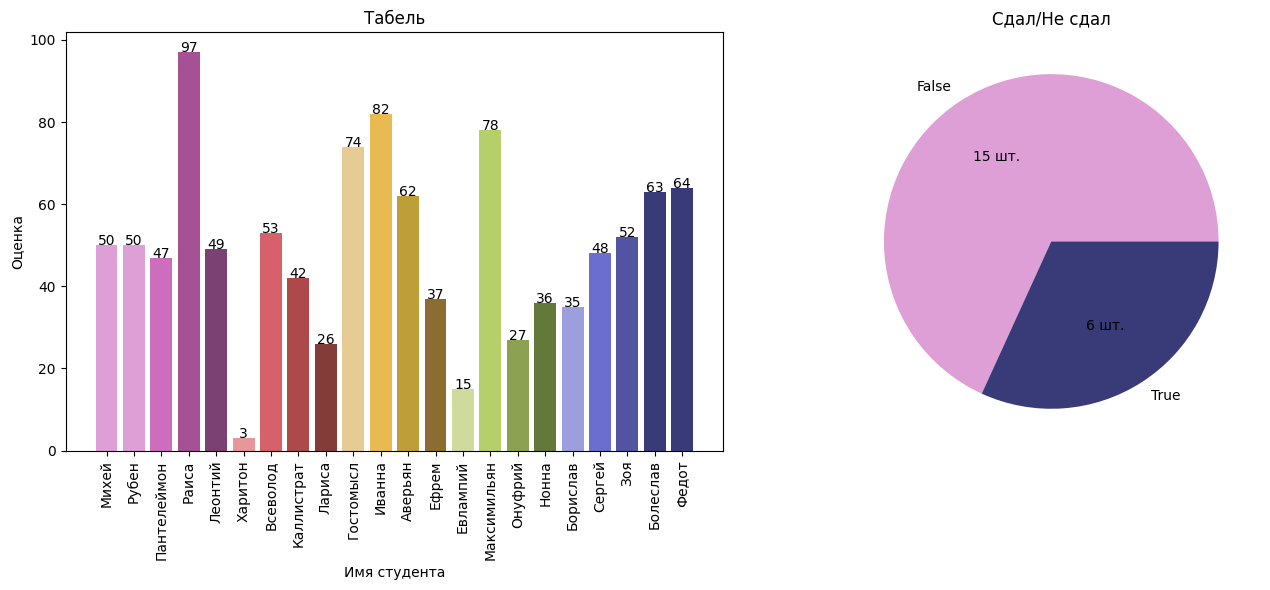

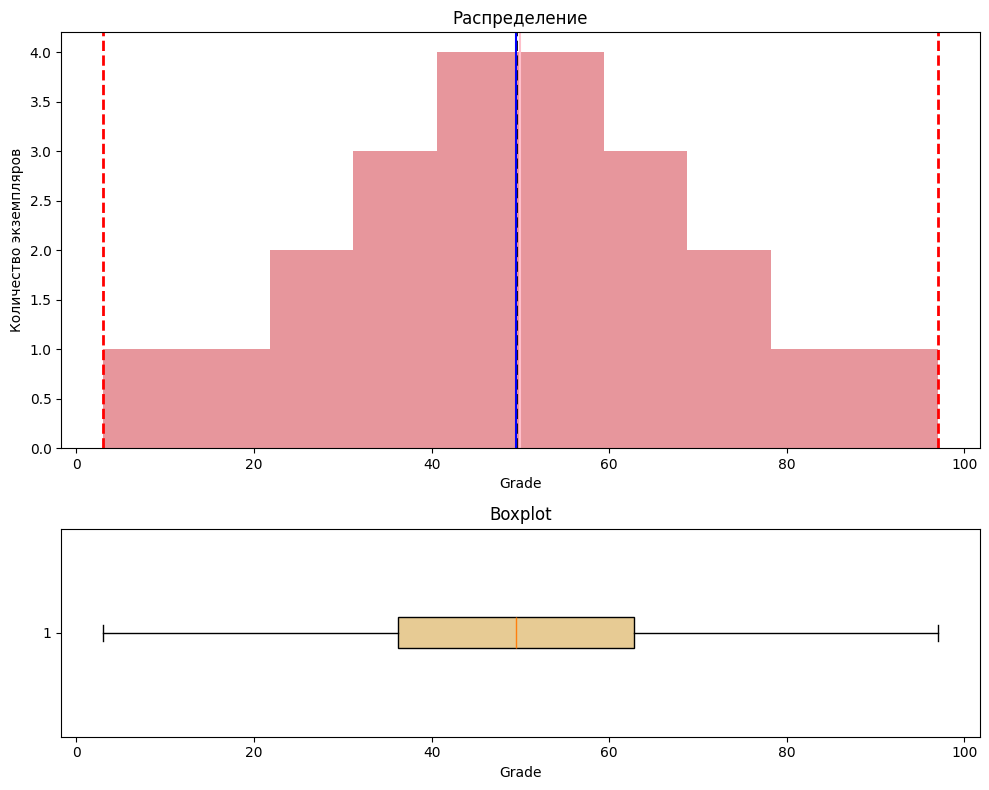

Минимальное значение: 3.00
Максимальное значение: 97.00
Среднее значение: 49.55
Медиана: 49.50
Мода: 50.00


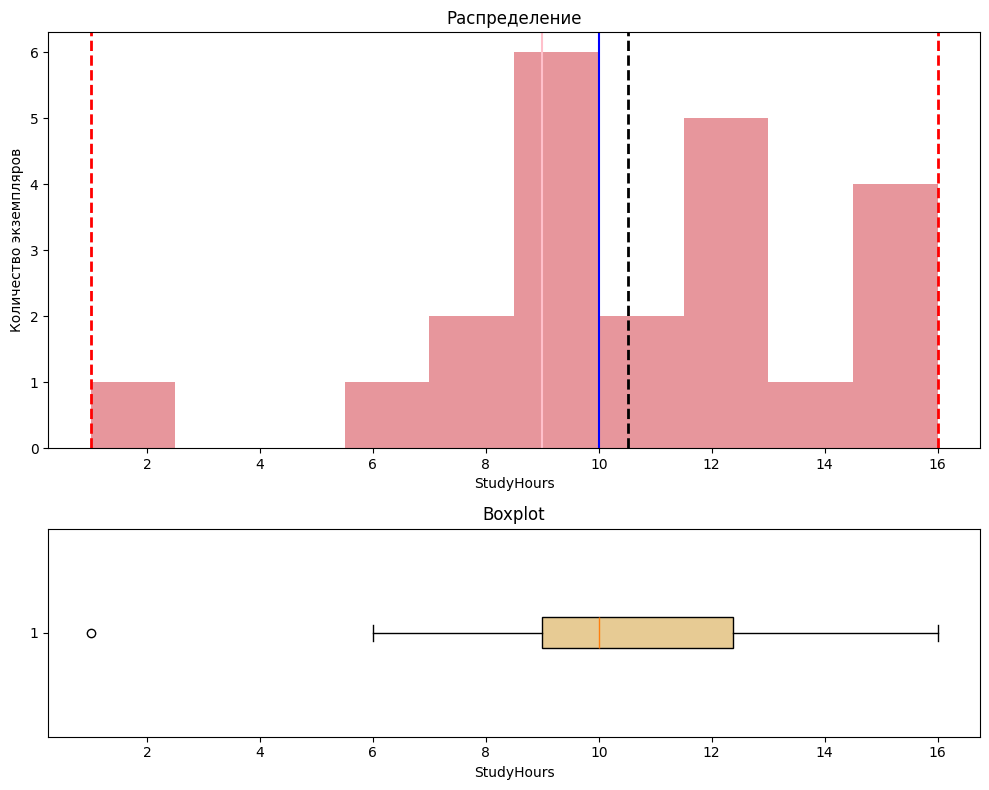

Минимальное значение: 1.00
Максимальное значение: 16.00
Среднее значение: 10.52
Медиана: 10.00
Мода: 9.00


In [ ]:
plot_bar_and_pie(df_students, 'Grade', 'Pass')
show_distribution(df_students['Grade'], 'Grade')
show_distribution(df_students['StudyHours'], 'StudyHours')


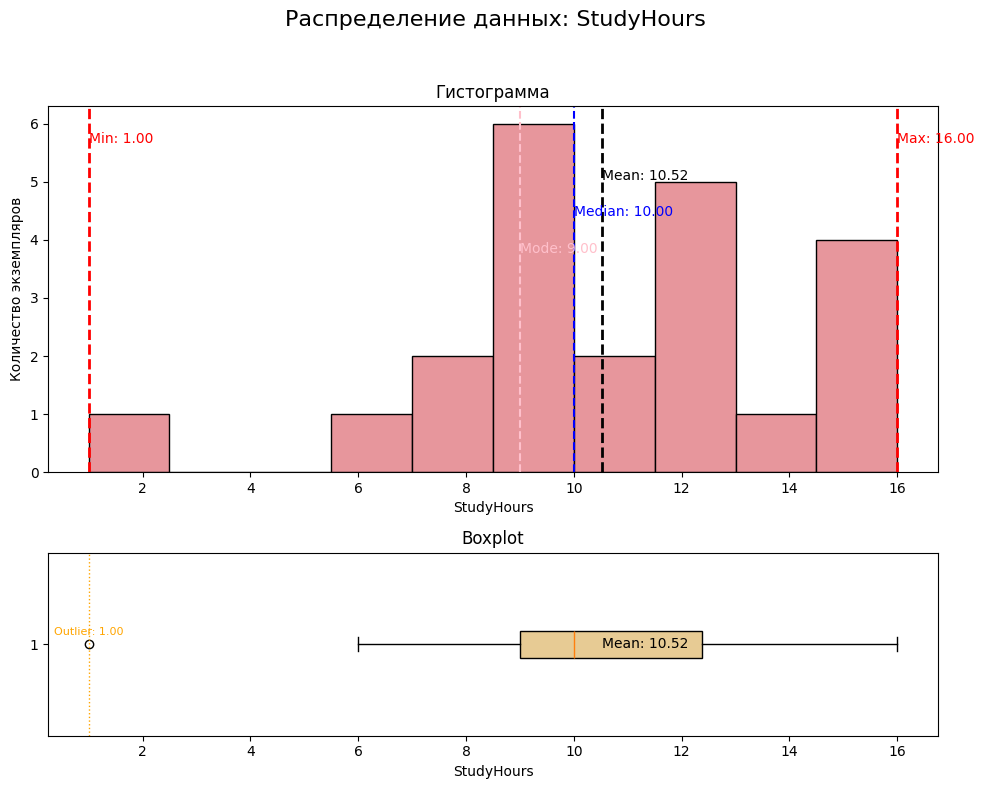

Минимальное значение: 1.00
Максимальное значение: 16.00
Среднее значение: 10.52
Медиана: 10.00
Мода: 9.00


## Предобработка данных
Кодирование категориальных переменных, в этом уроке не предусмотренно.
предусмотренно: Удаление NaN, Генерация новых признаков, Конкатинация признаков, Нормализация числовых признаков.



```
# Чистый код в файле Lesson_1_part_2_solution.ipynb
```



нулевая индексация (zero-based indexing).

Нулевая индексация означает, что первый элемент массива или списка имеет индекс 0, второй — индекс 1, и так далее. Это свойство используется в большинстве современных языков программирования, включая Python, C, Java, и JavaScript.

In [ ]:
my_list = [10, 20, 30, 40]
print(my_list[0])  # Выведет 10
print(my_list[1])  # Выведет 20


10
20


In [ ]:
#Numpy vs Python
print(np.mean(grades) == grades.mean())
print(f'средняя оценка учащегося = {grades.mean().round(2)}')  #round в Python — это встроенная функция. используется для округления чисел

#Now lets have add Study hours
study_hours = [10.0,11.5,9.0,16.0,9.25,1.0,11.5,9.0,8.5,14.5,15.5,13.75,9.0,8.0,15.5,8.0,9.0,6.0,10.0,12.0,12.5,12.0]
#& add it to Grades
student_data = np.array([study_hours, grades])
#If we used [0] we take a first array
#If we used [0][0] we take a first element in first array
#Example
print(f'\nПервый элемент массива {student_data[0]}')
print(f'\nПервое значение в первом массиве {student_data[0][0]}')

True
средняя оценка учащегося = 49.55

Первый элемент массива [10.   11.5   9.   16.    9.25  1.   11.5   9.    8.5  14.5  15.5  13.75
  9.    8.   15.5   8.    9.    6.   10.   12.   12.5  12.  ]

Первое значение в первом массиве 10.0


In [ ]:
avg_study = student_data[0].mean()
avg_grade = student_data[1].mean()

print(f'Average Study Time: {avg_study.round(2)}\nAverage Grade: {avg_grade.round(2)}')

Average Study Time: 10.52
Average Grade: 49.55


## Создание DataFrame


In [ ]:
#DF будет состоять из колонок ['Name','StudyHours','Grade']
#Мы могли бы написать имена руками? или попросить список у GPT, ну или найти в интернете, но как мы тогда самоутвердимся?
"""
Faker() создает объект, генерирующий тестовые данные.
fake.first_name() – возвращает случайное имя.
fake_ru = Faker('ru_RU') – позволяет генерировать русские имена.
"""
#Устанавливаем библиотеку
!pip install faker
from faker import Faker
# Генерация имен на русском
fake = Faker('ru_RU')
names = [fake.first_name() for _ in range(22)]
print(names)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.5 MB/s eta 0:00:00
['Пимен', 'Гедеон', 'Василиса', 'Петр', 'Ипат', 'Аскольд', 'Эммануил', 'Владлен', 'Гаврила', 'Иван', 'Ювеналий', 'Максимильян', 'Нифонт', 'Никифор', 'Ангелина', 'Демьян', 'Иннокентий', 'Валерия', 'Измаил', 'Лазарь', 'Элеонора', 'Куприян']


In [ ]:
import pandas as pd
df_students = pd.DataFrame({'Name' : names, 'StudyHours' : student_data[0], 'Grade' : student_data[1]})

In [ ]:
print(f'Размер DataFrame = {df_students.shape}\nПервый элемент указывает на кол-во строк {df_students.shape[0]}, \nвторой на кол-во столбцов {df_students.shape[1]}')

Размер DataFrame = (22, 3)
Первый элемент указывает на кол-во строк 22, 
второй на кол-во столбцов 3


In [ ]:
print(f'DF изначально ориентирован на строки, и что бы увидеть строку мы используем метод df.loc[] \n{df_students.loc[0]}')
#Если мы желаем получить скажем только оценку, то мы используем этот же метод но с указанием имени нужного столбца
df_students.loc[0,'Grade']

DF изначально ориентирован на строки, и что бы увидеть строку мы используем метод df.loc[] 
Name          Пимен
StudyHours     10.0
Grade          50.0
Name: 0, dtype: object


50.0

In [ ]:
#Если мы знаем имя студента, то мы можем обратиться в df и найти строку с соответствующим значением в столбце
df_students[df_students['Name']=='Каллистрат']

,Name,StudyHours,Grade


In [ ]:
#Если мы знаем имя студента, то мы можем обратиться в df и найти строку с соответствующим значением в столбце
df_students.query('Name == "Каллистрат"')

,Name,StudyHours,Grade


In [ ]:
#Если мы знаем имя студента, то мы можем обратиться в df и найти строку с соответствующим значением в столбце
df_students[df_students.Name == 'Каллистрат']

,Name,StudyHours,Grade


## Сохранение DataFrame для будущей эксплуатации
Это фундаментальные основы Pandas. Но давайте вернемся к реальной жизни, где файлы чаще всего хранятся в .csv формате

Для начала мы сохраним наш DataFrame в .csv формат на облаке.
А после откроем наш файл из облака - тем самым повторим реальный опыт.

In [ ]:
#Подключаем Gdrive
from google.colab import drive
drive.mount('/content/drive')
#Указывем путь для сохранения
save_file_path = '/content/drive/MyDrive/Colab Notebooks/students_data.csv'
#Сохраняем
df_students.to_csv(save_file_path, index=False)

Mounted at /content/drive


In [ ]:
#Скачиваем csv файл и открываем в виде DataFrame
load_path = save_file_path
df_students = pd.read_csv(load_path, delimiter = ',', header = 'infer')


In [ ]:
df_students.head()

,Name,StudyHours,Grade
0,Пимен,10.00,50.0
1,Гедеон,11.50,50.0
2,Василиса,9.00,47.0
3,Петр,16.00,97.0
4,Ипат,9.25,49.0


In [ ]:
# В pandas, метод df_students.isnull() ищет пустые ячейки или значения NaN (Not a Number).
# Метод isnull() возвращает DataFrame того же размера, где каждая ячейка содержит:
#    True — если значение отсутствует (NaN).
#    False — если значение присутствует.
print(df_students.isnull().sum())

Name          0
StudyHours    0
Grade         0
dtype: int64


In [ ]:
# Наш DF синтетический и в нем все идеально, но давайте добавим пропуски (np.nan), что бы попрактиковаться в их заполнении и удалении
print(df_students.loc[(df_students["Grade"] < 25) & (df_students["Grade"] > 5)])
# Добавим NaN при выполнении условия: 5 < значение < 25
df_students.loc[(df_students["Grade"] < 25) & (df_students["Grade"] > 5), ['Grade', 'StudyHours']] = np.nan
print(df_students.isnull().sum())

       Name  StudyHours  Grade
13  Никифор         8.0   15.0
Name          0
StudyHours    1
Grade         1
dtype: int64


In [ ]:
# Попрактикуемся заполнять np.nan на примере столбца StudyHours (используем среднее значение по столбцу)
df_students.StudyHours = df_students.StudyHours.fillna(df_students.StudyHours.mean())
print(df_students.isnull().sum())


Name          0
StudyHours    0
Grade         1
dtype: int64


In [ ]:
# Удалим строки содержащие np.nan, примечание: (axis=0 - строки; axis=1 - столбцы)
df_students = df_students.dropna(axis = 0)
print(df_students.isnull().sum())

Name          0
StudyHours    0
Grade         0
dtype: int64


In [ ]:
#Вернемся к изучению цифр
mean_study = df_students['StudyHours'].mean()
mean_grade = df_students.Grade.mean()
print('Среднее кол-во учебных часов: {:.2f}\nСредняя оценка: {:.2f}'.format(mean_study, mean_grade))

Среднее кол-во учебных часов: 10.64
Средняя оценка: 51.19


In [ ]:
df_students[df_students.StudyHours > mean_study]

,Name,StudyHours,Grade
1,Гедеон,11.50,50.0
3,Петр,16.00,97.0
6,Эммануил,11.50,53.0
9,Иван,14.50,74.0
10,Ювеналий,15.50,82.0
11,Максимильян,13.75,62.0
14,Ангелина,15.50,78.0
19,Лазарь,12.00,52.0
20,Элеонора,12.50,63.0
21,Куприян,12.00,64.0


In [ ]:

df_students[df_students.StudyHours > mean_study].Grade.mean()

67.5

In [ ]:
#Создадим серию True/False значений по условию
import pandas as pd
passed = pd.Series(df_students.Grade >= 60)
passed

,Grade
0,False
1,False
2,False
3,True
4,False
5,False
6,False
7,False
8,False
9,True


In [ ]:
df_students = pd.concat([df_students, passed.rename('Passed')], axis = 1)

In [ ]:
df_students.groupby(df_students.Passed).Name.count()

,Name
Passed,
False,14
True,7


In [ ]:
print(df_students.groupby(df_students.Passed).Grade.mean())

Passed
False    39.642857
True     74.285714
Name: Grade, dtype: float64


In [ ]:
#Посмотрим средние значения оценок и часов сгруппированные по столбцу Passed
df_students.groupby(df_students.Passed)[['StudyHours','Grade']].mean()

,StudyHours,Grade
Passed,,
False,8.839286,39.642857
True,14.250000,74.285714


In [ ]:
df_students = df_students.sort_values('Grade')#, ascending=False)
df_students.head()

,Name,StudyHours,Grade,Passed
5,Аскольд,1.0,3.0,False
8,Гаврила,8.5,26.0,False
15,Демьян,8.0,27.0,False
17,Валерия,6.0,35.0,False
16,Иннокентий,9.0,36.0,False


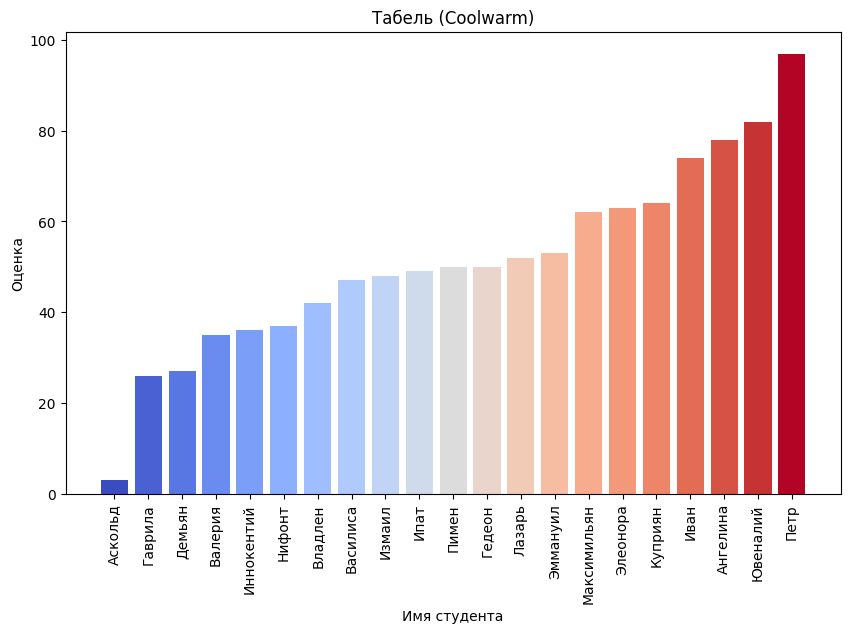

In [ ]:
colors = plt.cm.coolwarm(np.linspace(0, 1, len(df_students)))
plt.figure(figsize=(10,6))
plt.bar(df_students.Name, df_students.Grade, color=colors)
plt.title('Табель (Coolwarm)')
plt.xlabel('Имя студента')
plt.ylabel('Оценка')
plt.xticks(rotation=90)
plt.show()

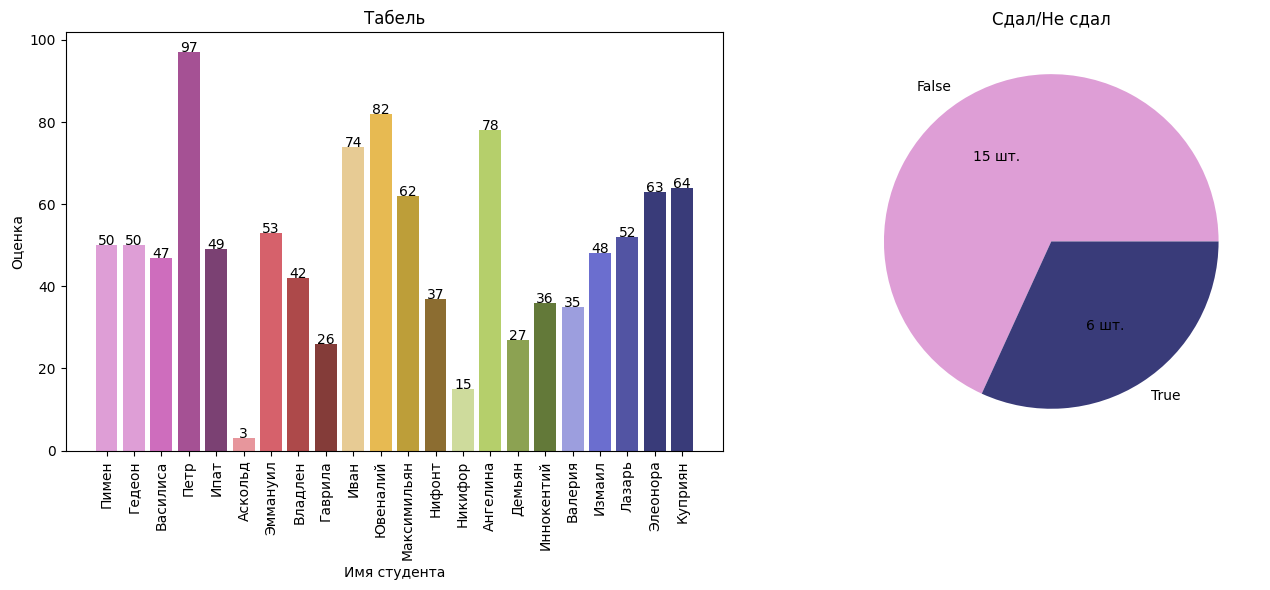

In [ ]:

#df_students.plot.bar(x='Name', y='Grade', color=plt.cm.tab20b_r(np.linspace(0, 1, len(df_students))))

# Создаем столбчатую диаграмму
pass_counts = df_students['Pass'].value_counts()

# Округление значений на первом графике до целого числа
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# График столбчатый с округлением
bars = ax[0].bar(df_students.Name, df_students.Grade, color=plt.cm.tab20b_r(np.linspace(0, 1, len(df_students))))
for bar, grade in zip(bars, df_students.Grade):
    ax[0].text(bar.get_x() + bar.get_width()/2, round(bar.get_height()), str(round(grade)), ha='center')

# Настройки для bar
ax[0].set_title('Табель')
ax[0].set_xlabel('Имя студента')
ax[0].set_ylabel('Оценка')
ax[0].tick_params(axis='x', rotation=90)

# График круговой (Pie Chart) с отображением количества
ax[1].pie(pass_counts, labels=pass_counts.index,
          autopct=lambda p: f'{int(p/100.*sum(pass_counts))} шт.',
          colors=plt.cm.tab20b_r(np.linspace(0, 1, len(pass_counts))))
ax[1].set_title('Сдал/Не сдал')

plt.tight_layout()
plt.show()



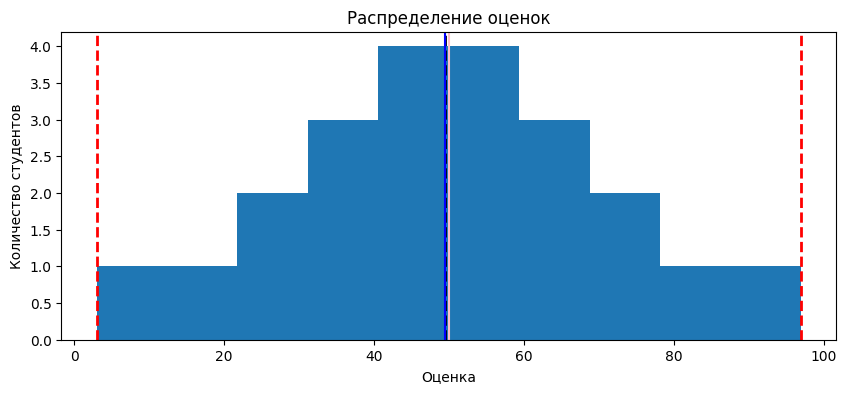

In [ ]:
grades = df_students.Grade

min_val = grades.min()
max_val = grades.max()
mean_val = grades.mean()
median_val = grades.median()
mode_val = grades.mode()[0]

fig = plt.figure(figsize=(10, 4))
plt.hist(grades)

plt.axvline(min_val, color='red', linestyle='dashed', linewidth=2)
plt.axvline(max_val, color='red', linestyle='dashed', linewidth=2)
plt.axvline(mean_val, color='black', linestyle='dashed', linewidth=2)
plt.axvline(median_val, color='blue')
plt.axvline(mode_val, color='pink')

plt.title('Распределение оценок')
plt.xlabel('Оценка')
plt.ylabel('Количество студентов')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

#Рабочее решение
##Здесь лежит черновик получившийся в ходе подготовки рабочей версии:


```
Lesson_1_part_2_solution
```



##EDA

           Name  StudyHours  Grade   Pass
0         Пимен       10.00   50.0  False
1        Гедеон       11.50   50.0  False
2      Василиса        9.00   47.0  False
3          Петр       16.00   97.0   True
4          Ипат        9.25   49.0  False
5       Аскольд        1.00    3.0  False
6      Эммануил       11.50   53.0  False
7       Владлен        9.00   42.0  False
8       Гаврила        8.50   26.0  False
9          Иван       14.50   74.0   True
10     Ювеналий       15.50   82.0   True
11  Максимильян       13.75   62.0   True
12       Нифонт        9.00   37.0  False
13      Никифор        8.00   15.0  False
14     Ангелина       15.50   78.0   True
15       Демьян        8.00   27.0  False
16   Иннокентий        9.00   36.0  False
17      Валерия        6.00   35.0  False
18       Измаил       10.00   48.0  False
19       Лазарь       12.00   52.0  False
20     Элеонора       12.50   63.0   True
21      Куприян       12.00   64.0   True


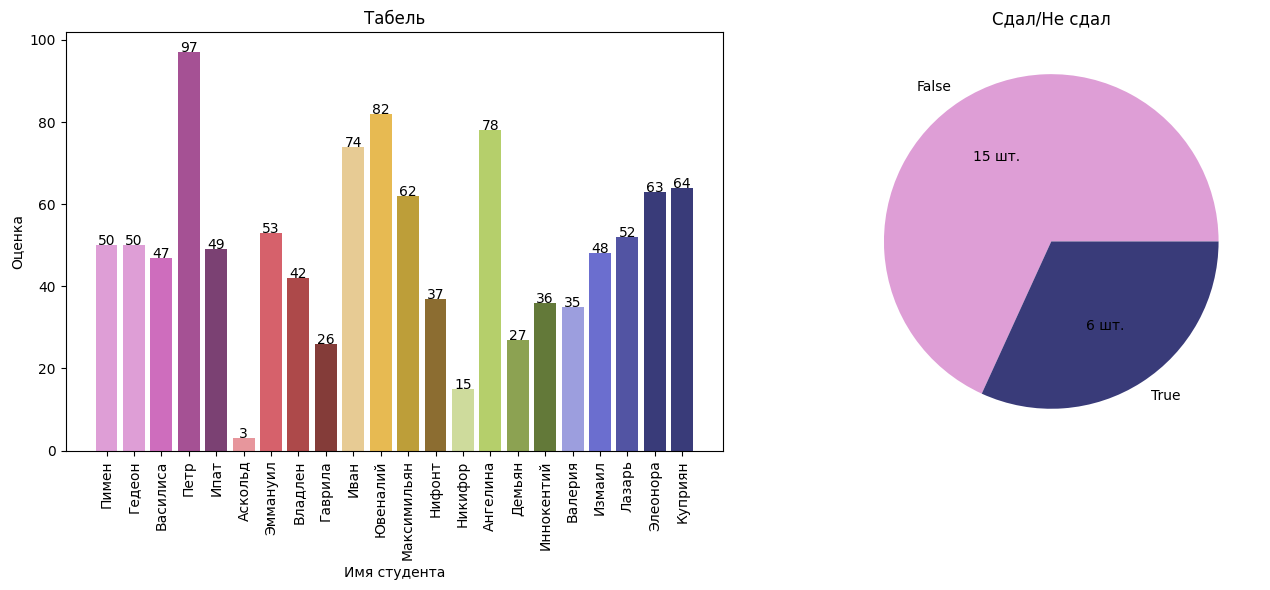

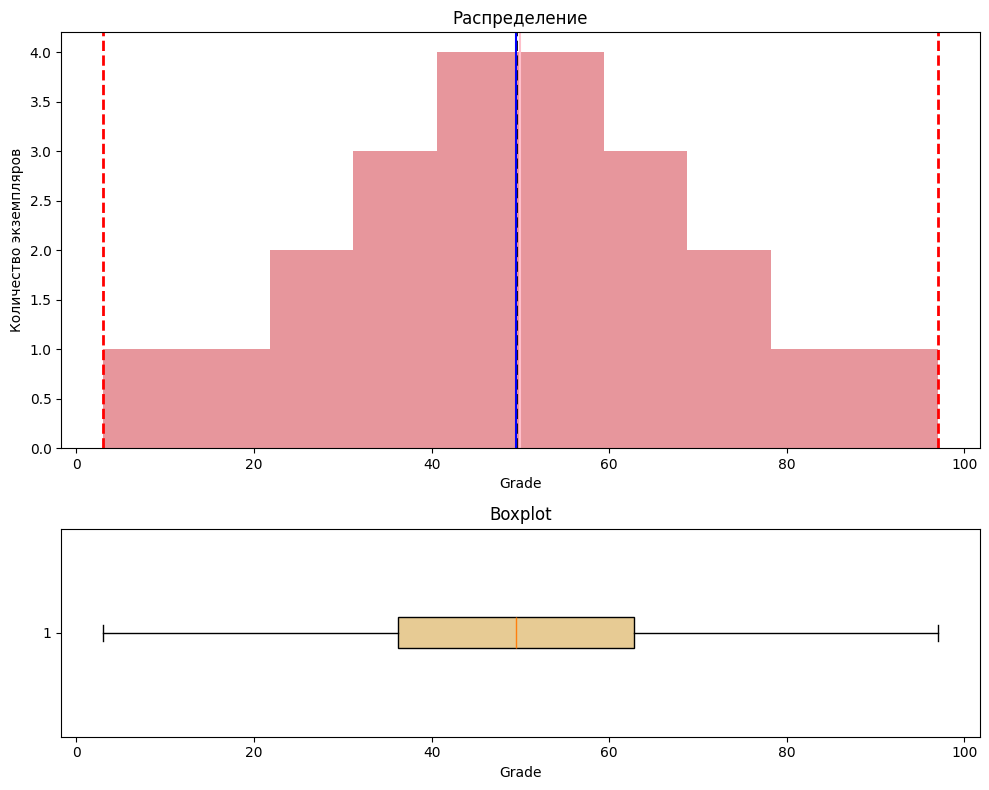

Минимальное значение: 3.00
Максимальное значение: 97.00
Среднее значение: 49.55
Медиана: 49.50
Мода: 50.00


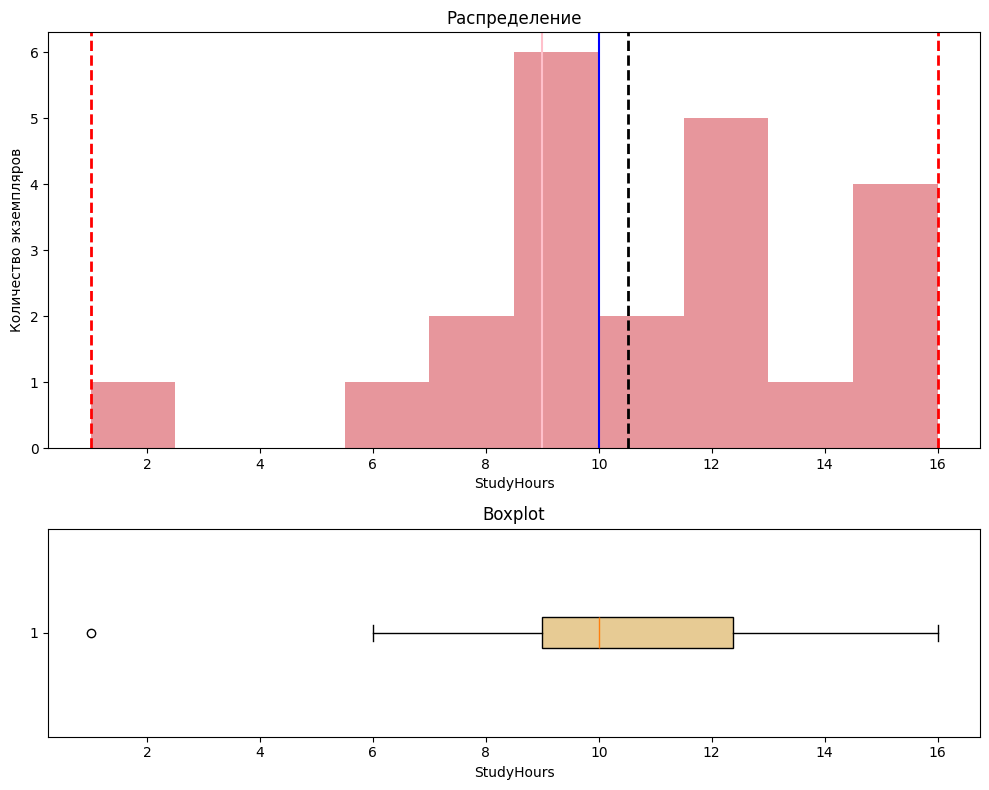

Минимальное значение: 1.00
Максимальное значение: 16.00
Среднее значение: 10.52
Медиана: 10.00
Мода: 9.00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

#drive.mount('/content/drive')
load_path = '/content/drive/MyDrive/Colab Notebooks/students_data.csv'
df_students = pd.read_csv(load_path, delimiter = ',', header = 'infer')

df_students = df_students.dropna(axis=0, how='any')
passes = pd.Series(df_students['Grade'] >= 60)
df_students = pd.concat([df_students, passes.rename('Pass')],axis=1)

print(df_students)

# Функция отображения гистограммы и горизонтального boxplot
# Обновленное определение функции для текущего выполнения
def show_distribution(var_data, column_name):
    # Вычисление статистических показателей
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    median_val = var_data.median()
    mode_val = var_data.mode()[0]

    # Создание фигуры с двумя строками: гистограмма и boxplot
    fig, ax = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [2, 1]})

    # Первая строка: гистограмма
    ax[0].hist(var_data, color=plt.cm.tab20b_r(0.2))
    ax[0].axvline(min_val, color='red', linestyle='dashed', linewidth=2)
    ax[0].axvline(max_val, color='red', linestyle='dashed', linewidth=2)
    ax[0].axvline(mean_val, color='black', linestyle='dashed', linewidth=2)
    ax[0].axvline(median_val, color='blue')
    ax[0].axvline(mode_val, color='pink')
    ax[0].set_title('Распределение')
    ax[0].set_xlabel(column_name)
    ax[0].set_ylabel('Количество экземпляров')

    # Вторая строка: горизонтальный boxplot
    ax[1].boxplot(var_data, vert=False, patch_artist=True, boxprops=dict(facecolor=plt.cm.tab20b_r(0.4)))
    ax[1].set_title('Boxplot')
    ax[1].set_xlabel(column_name)

    plt.tight_layout()
    plt.show()
    print('Минимальное значение: {:.2f}\nМаксимальное значение: {:.2f}\nСреднее значение: {:.2f}\nМедиана: {:.2f}\nМода: {:.2f}'.format(min_val, max_val, mean_val, median_val, mode_val))
# Функция столбчатой диаграммы и круговой диаграммы
def plot_bar_and_pie(data, grade_column, pass_column):
    """
    Построение столбчатой диаграммы и круговой диаграммы на одной фигуре.

    Параметры:
    - data: DataFrame — таблица данных Pandas
    - grade_column: str — название столбца с оценками
    - pass_column: str — название столбца с данными о сдаче экзамена
    """


    # Подсчет уникальных значений в столбце pass_column
    pass_counts = data[pass_column].value_counts()

    # Создание фигуры с двумя диаграммами
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # График столбчатый с округлением значений
    colors = plt.cm.tab20b_r(np.linspace(0, 1, len(data)))
    bars = ax[0].bar(data['Name'], data[grade_column], color=colors)
    for bar, grade in zip(bars, data[grade_column]):
        ax[0].text(bar.get_x() + bar.get_width()/2, round(bar.get_height()), str(round(grade)), ha='center')

    # Настройки для bar
    ax[0].set_title('Табель')
    ax[0].set_xlabel('Имя студента')
    ax[0].set_ylabel('Оценка')
    ax[0].tick_params(axis='x', rotation=90)

    # График круговой (Pie Chart) с отображением количества
    ax[1].pie(pass_counts, labels=pass_counts.index,
              autopct=lambda p: f'{int(p/100.*sum(pass_counts))} шт.',
              colors=plt.cm.tab20b_r(np.linspace(0, 1, len(pass_counts))))
    ax[1].set_title('Сдал/Не сдал')

    plt.tight_layout()
    plt.show()

# Вызов функции отображения графиков
plot_bar_and_pie(df_students, 'Grade', 'Pass')

# Вызов функции для отображения распределения Оценок
show_distribution(df_students['Grade'], 'Grade')

# Вызов функции для отображения распределения Учебных часов
show_distribution(df_students['StudyHours'], 'StudyHours')



##Outliers
Так как наша цель - построить линию регрессии, нам потребуется избавиться от выбросов. Это важно, потому что выбросы будут смещать линию из-за природы регрессии, которая стремиться к усреднению.

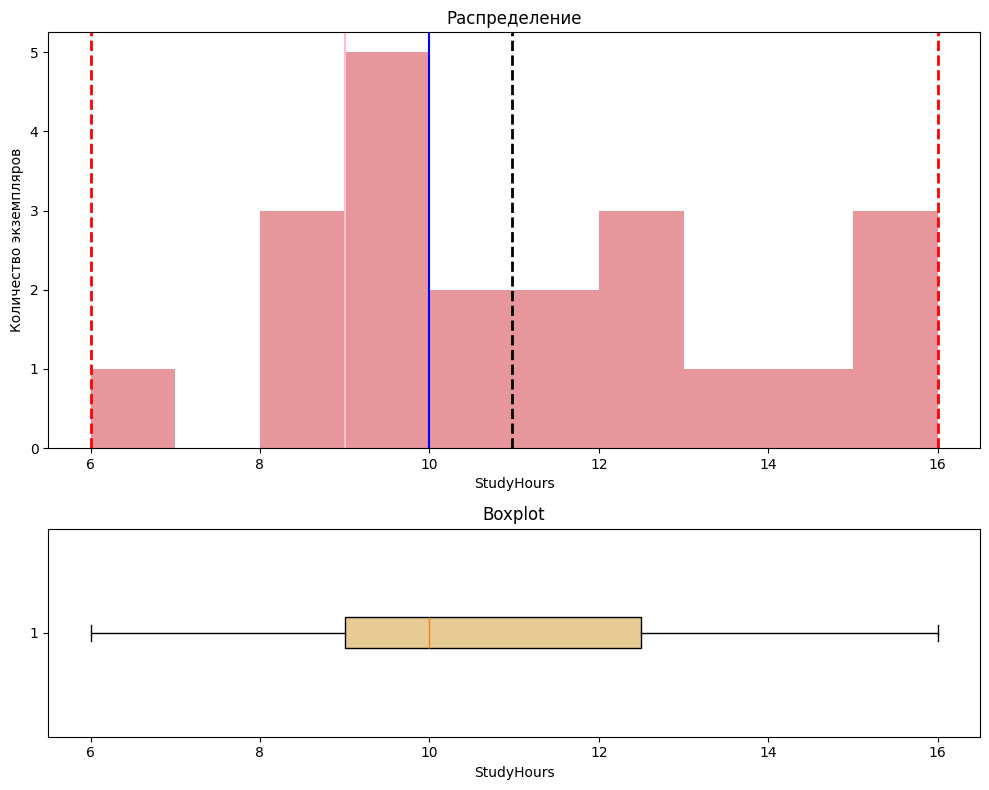

Минимальное значение: 6.00
Максимальное значение: 16.00
Среднее значение: 10.98
Медиана: 10.00
Мода: 9.00


In [ ]:
# Вызов функции для отображения распределения Учебных часов
show_distribution(df_students[df_students.StudyHours > 1]['StudyHours'], 'StudyHours')

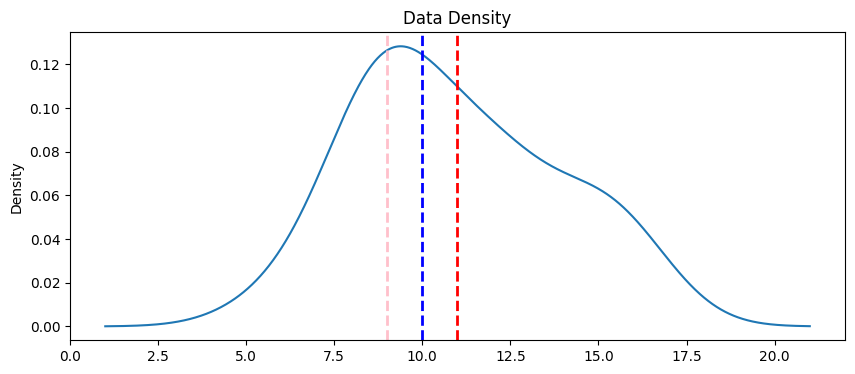

In [ ]:
def show_density(var_data):
  fig = plt.figure(figsize=(10, 4))
  var_data.plot.density()
  plt.title('Data Density')
  plt.axvline(x = var_data.mean(), color = 'red', linestyle = 'dashed', linewidth = 2)
  plt.axvline(x = var_data.median(), color = 'blue', linestyle = 'dashed', linewidth = 2)
  plt.axvline(x = var_data.mode()[0], color = 'pink', linestyle = 'dashed', linewidth = 2)
  plt.show()

show_density(df_students[df_students.StudyHours > 1]['StudyHours'])

##Variance, STD & Describe

In [ ]:
import math
mean = df_students.StudyHours.mean()
variance = 0

for hours in df_students.StudyHours:
  variance += (hours - mean) ** 2

variance = (variance / df_students.shape[0]).round(4)

std = math.sqrt(variance)
std

3.4069634573913468

In [ ]:
for col_name in ['Grade', 'StudyHours']:
  col = df_students[col_name]
  rng = col.max() - col.min()
  var = col.var()
  std = col.std()
  print(f'\n{col_name}:\n - Range: {rng}\n - Variance: {var}\n - Standard Deviation: {std}')

df_students.describe()


Grade:
 - Range: 94.0
 - Variance: 491.3073593073593
 - Standard Deviation: 22.16545418680518

StudyHours:
 - Range: 15.0
 - Variance: 12.160173160173159
 - Standard Deviation: 3.487143983286775


,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.545455
std,3.487144,22.165454
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


Axes(0.1,0.15;0.8x0.75)
Axes(0.125,0.11;0.775x0.77)


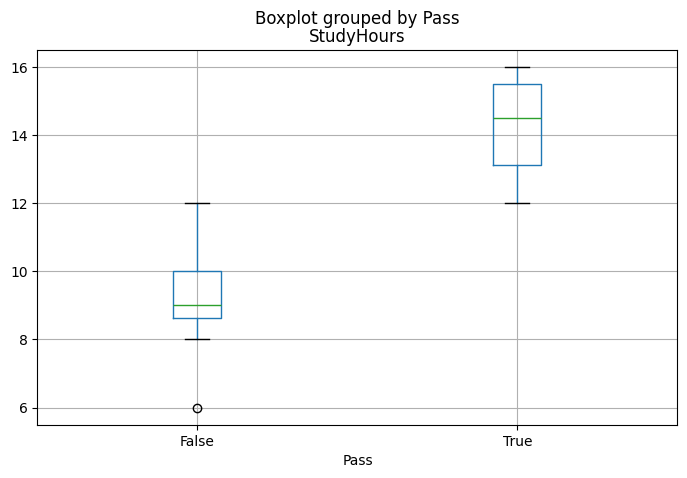

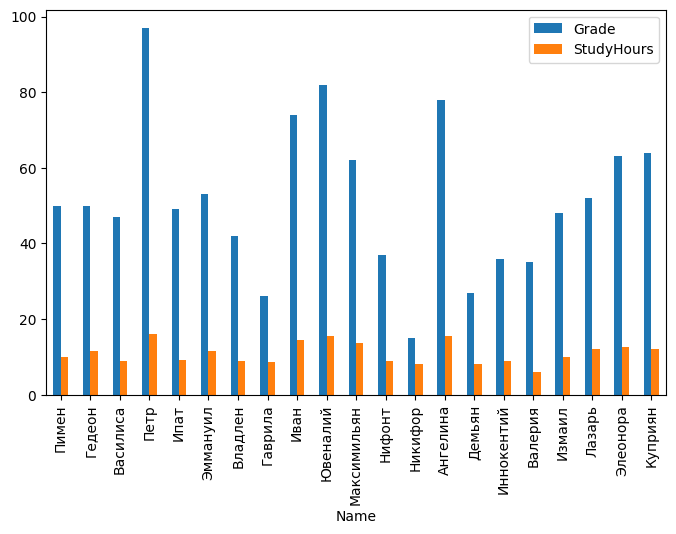

In [ ]:
df_sample = df_students[df_students.StudyHours > 1]
print(df_sample.boxplot(column='StudyHours', by='Pass', figsize=(8, 5)))
print(df_sample.plot(x = 'Name', y = ['Grade', 'StudyHours'], kind = 'bar', figsize=(8, 5)))

##MinMaxScaler
Займемся нормализацией значений

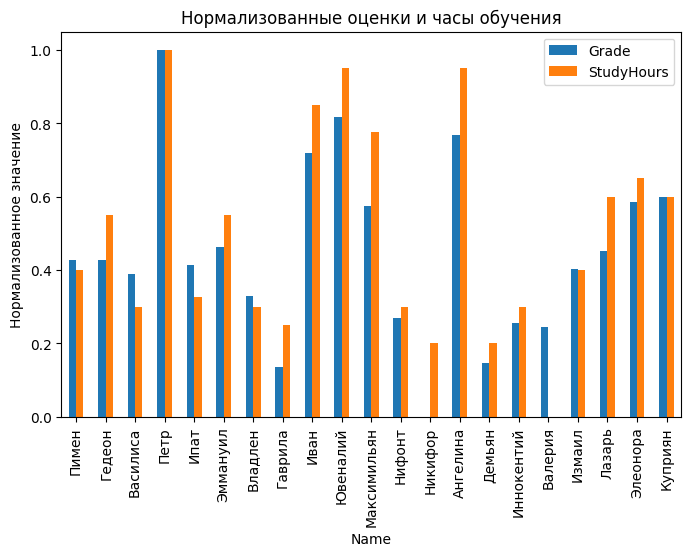

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_normalized = df_sample[['Name', 'Grade', 'StudyHours']].copy()
df_normalized[['Grade', 'StudyHours']] = scaler.fit_transform(df_normalized[['Grade', 'StudyHours']])

# Построение столбчатой диаграммы через метод .plot
df_normalized.plot(x='Name', y=['Grade', 'StudyHours'], kind='bar', figsize=(8, 5))
plt.title('Нормализованные оценки и часы обучения')
plt.ylabel('Нормализованное значение')
plt.show()

In [ ]:
df_normalized.Grade.corr(df_normalized.StudyHours)

0.9230635738404335

<Axes: title={'center': 'Учебные часы на Оценки'}, xlabel='StudyHours', ylabel='Grade'>

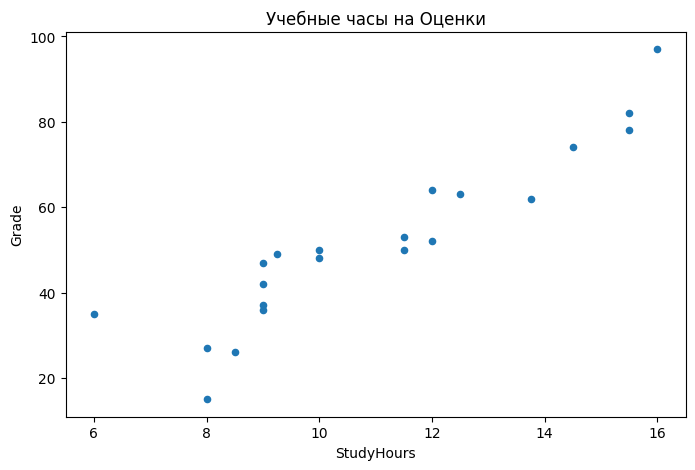

In [ ]:
df_sample.plot.scatter(title = 'Учебные часы на Оценки',x='StudyHours', y='Grade', figsize=(8, 5))

## Построение моделей
углубимся в математическое обоснование линейной регрессии

y = mx + b

f(x)

error = xy - f(x) ** 2


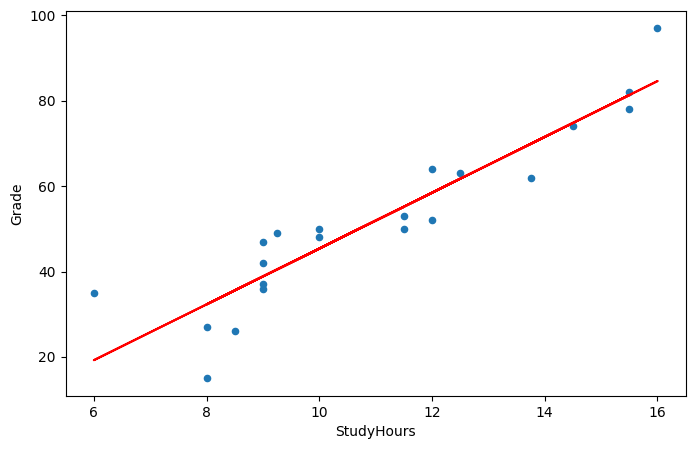

6.53910396792992 -20.01254593370699


In [ ]:
from scipy import stats
df_regression = df_sample[['Grade', 'StudyHours']].copy()
m, b, r, p, se = stats.linregress(df_regression.StudyHours, df_regression.Grade)
df_regression['fx'] = (m * df_regression.StudyHours) + b
df_regression['error'] = df_regression['fx'] - df_regression['Grade']

df_regression.plot.scatter(x='StudyHours', y='Grade', figsize=(8, 5))
plt.plot(df_regression.StudyHours, df_regression.fx, color='red')
plt.show()
print(m,b)


То ради чего мы старались!


#Prediction

In [ ]:
def predict(x):
  m = 6.5391
  b = -20.0125
  return m*x+b

prediction = predict(14)
prediction

71.53490000000001

In [ ]:
from google.colab import auth
auth.authenticate_user()



## Оценка моделей
Метрики оценки качества.



## Выводы и рекомендации
Основные выводы.



## Технико-методологические заметки
Используемые библиотеки и методология.

## встроенные функции numpy
В Python для работы с массивами `numpy` (`np.array`) используются как встроенные функции самой библиотеки `numpy`, так и некоторые стандартные Python функции. Вот основные встроенные функции для работы с `np.array`:

### Создание массивов:
- `np.array()` – создание массива из списка или кортежа.
- `np.zeros(shape)` – массив из нулей.
- `np.ones(shape)` – массив из единиц.
- `np.full(shape, value)` – массив, заполненный заданным значением.
- `np.arange(start, stop, step)` – аналог `range()`, создание массива с равномерным шагом.
- `np.linspace(start, stop, num)` – равномерное разбиение интервала.
- `np.eye(n)` – единичная матрица.
- `np.random.rand(shape)` – массив случайных значений от 0 до 1.

### Свойства массива:
- `array.shape` – размерности массива.
- `array.ndim` – количество осей (измерений).
- `array.size` – общее количество элементов.
- `array.dtype` – тип данных элементов массива.

### Индексация и срезы:
- `array[i]` – доступ к элементу по индексу.
- `array[start:stop:step]` – срезы массива.
- `array[...]` – использование многоточия для многомерных массивов.
- `np.where(condition)` – индексы элементов, удовлетворяющих условию.

### Математические операции:
- `np.add(array1, array2)` – сложение массивов.
- `np.subtract(array1, array2)` – вычитание.
- `np.multiply(array1, array2)` – умножение поэлементное.
- `np.dot(array1, array2)` – скалярное произведение.
- `np.matmul(array1, array2)` – матричное умножение.
- `np.sum(array)` – сумма элементов.
- `np.mean(array)` – среднее значение.
- `np.std(array)` – стандартное отклонение.
- `np.min(array)` – минимальный элемент.
- `np.max(array)` – максимальный элемент.

### Трансформация массива:
- `array.reshape(shape)` – изменение формы массива.
- `array.flatten()` – преобразование многомерного массива в одномерный.
- `np.transpose(array)` – транспонирование массива.
- `np.concatenate((array1, array2))` – объединение массивов по указанной оси.
- `np.hstack((array1, array2))` – горизонтальное объединение.
- `np.vstack((array1, array2))` – вертикальное объединение.

### Логические операции:
- `np.all(array)` – возвращает `True`, если все элементы истинны.
- `np.any(array)` – возвращает `True`, если хотя бы один элемент истинен.
- `np.isfinite(array)` – проверка конечных значений.
- `np.isnan(array)` – проверка на `NaN`.

### Линейная алгебра:
- `np.linalg.inv(array)` – обратная матрица.
- `np.linalg.det(array)` – определитель матрицы.
- `np.linalg.eig(array)` – собственные значения и векторы.
- `np.linalg.svd(array)` – сингулярное разложение.

### Генерация случайных чисел:
- `np.random.seed(value)` – установка зерна для воспроизводимости.
- `np.random.randint(low, high, size)` – случайные целые числа.
- `np.random.normal(mean, std, size)` – выборка из нормального распределения.

Эти функции позволяют эффективно работать с массивами в Python, особенно в задачах машинного обучения, анализа данных и научных вычислений.